___
# Support Vector Machines Project 


## The Data
For this project, we will be using the famous Iris flower data set
(http://en.wikipedia.org/wiki/Iris_flower_data_set). 
The data set can be downloaded from 
https://archive.ics.uci.edu/ml/datasets/iris

However,in this project, it is taken from taken from seaborn library.

The data set consists of 50 samples from each of three species of Iris -- Iris setosa, Iris virginica and Iris versicolor. So there are 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Use seaborn to get the iris dataset  **

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

**Import libraries needed for analysis and visualization**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Create a pairplot of the data set.**

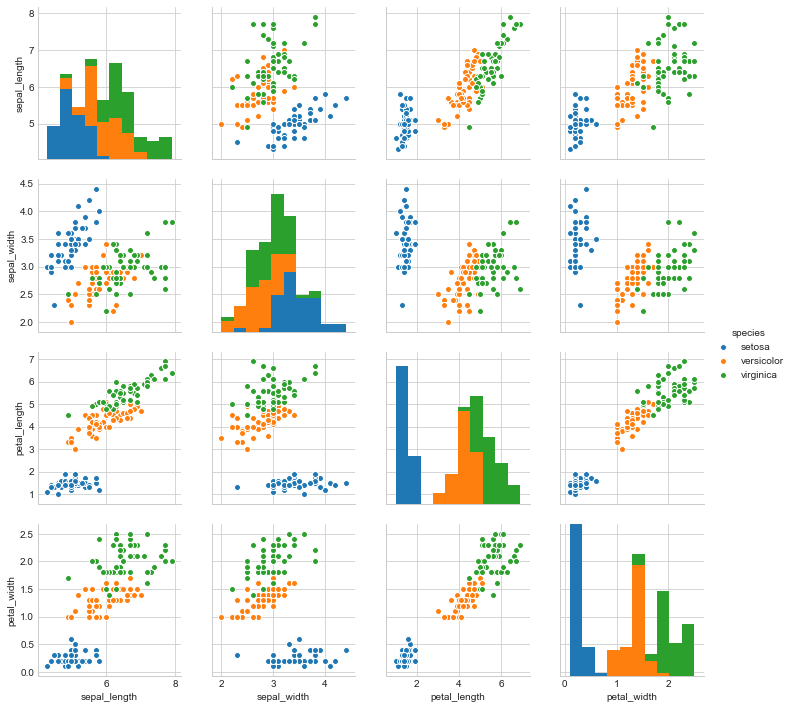

In [6]:
sns.pairplot(iris, hue = 'species')

**Observation: The species that seems the most separable is setosa. **

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

/Users/Jayashri/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


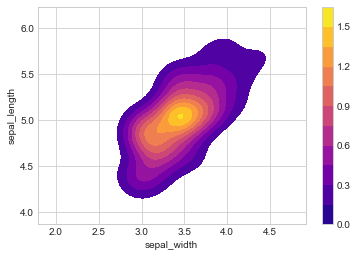

In [11]:
sns.set_style('whitegrid')
iris_setosa = iris[iris['species'] == 'setosa' ]
sns.kdeplot(iris_setosa['sepal_width'], 
            iris_setosa['sepal_length'],
            shade = True, shade_lowest = False,
            cmap = 'plasma',
            cbar = 'plasma')

# Train Test Split

** Split the data into a training set and a testing set.
Set test_size to 30%. **

In [22]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
X = iris.drop('species', axis = 1)
y = iris['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=101)


# Train a Model

Now we will train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [15]:
from sklearn.svm import SVC
model = SVC()

In [16]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

**Now we willget predictions from the model and create a confusion matrix and a classification report.**

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
predictions = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predictions))

Confusion Matrix
[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
------------------------------------------------
Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      1.00      1.00        20
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



**This model looks very good! **

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [19]:
from sklearn.grid_search import GridSearchCV


/Users/Jayashri/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Jayashri/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [23]:
param_grid = {'C': [0.1, 1, 10, 100],
               'gamma' : [0.1, 0.01, 0.001, 0.0001]}

** Create a GridSearchCV object and fit it to the training data.**

In [24]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3, refit = True)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [25]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.750000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.771429 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.764706 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.722222 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.714286 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.705882 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [27]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
grid_predictions = grid.predict(X_test)

In [32]:
print('Confusion Matrix')
print(confusion_matrix(y_test, grid_predictions))

Confusion Matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [34]:
print('Classification Report')
print(classification_report(y_test, grid_predictions))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.95      0.97        20
  virginica       0.92      1.00      0.96        12

avg / total       0.98      0.98      0.98        45



**Observation: The model was already good. So using GridSearch did not seem to make it any better.**